# <font color='blue'>Load Audio</font>

In [72]:
import librosa
import numpy as np
audio, sr = librosa.load("../../dihard_eval/data/flac/DH_0001.flac", sr=8000)

### Take first 4 seconds

In [73]:
audio = audio[:sr*4]
import IPython.display as ipd
ipd.Audio(audio, rate=sr) # load a NumPy array

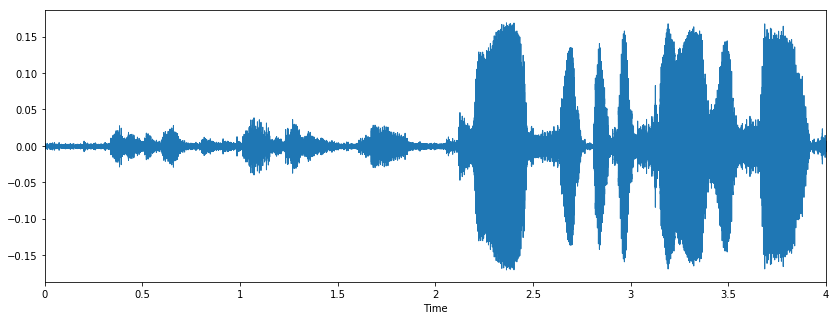

In [74]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio, sr=sr)

# <font color='blue'>Spectrogram and back</font>

In [75]:
n_fft=512
STFT = librosa.stft(audio, n_fft=n_fft, center=False)
magnitude, phase = librosa.magphase(STFT)

In [76]:
def inv_magphase(mag, phase_angle):
    phase = np.cos(phase_angle) + 1.j * np.sin(phase_angle)
    return mag * phase

### Magnitude

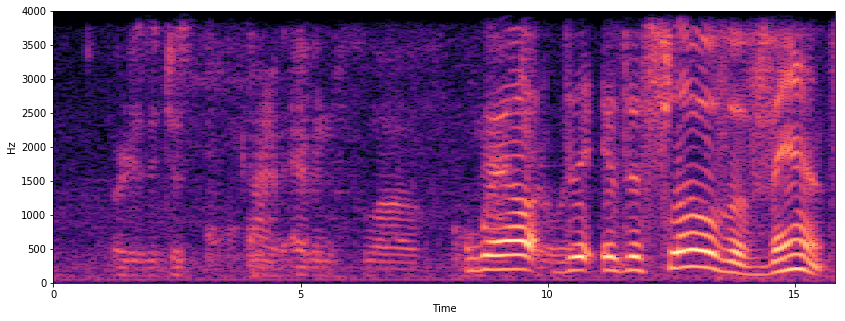

In [78]:
Xdb = librosa.amplitude_to_db(abs(STFT))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', fmax=sr)

### Reconstruction with real phase

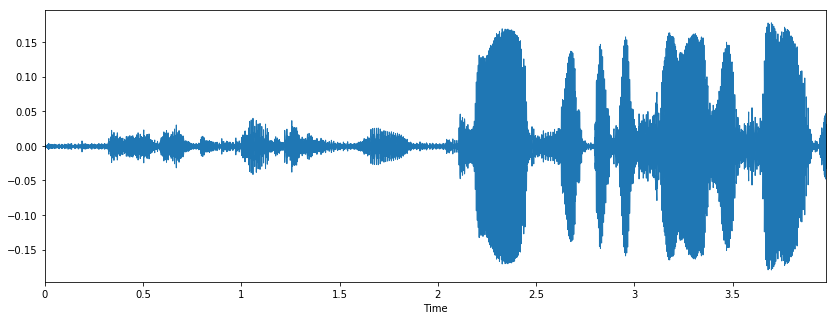

In [67]:
R_STFT = inv_magphase(magnitude, np.angle(phase))
audio_hat = librosa.core.istft(R_STFT, center=True)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_hat, sr=sr)
ipd.Audio(audio_hat, rate=sr) # load a NumPy array

### Recontruction with random phase

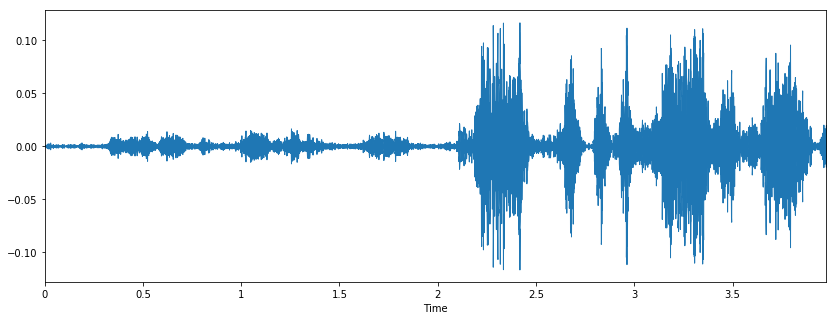

In [68]:
random_phase = np.random.randn(*magnitude.shape)
R_STFT = inv_magphase(magnitude, np.angle(random_phase))
audio_hat = librosa.core.istft(R_STFT, center=True)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_hat, sr=sr)
ipd.Audio(audio_hat, rate=sr) # load a NumPy array

### Reconstruction with Griffin-Lim

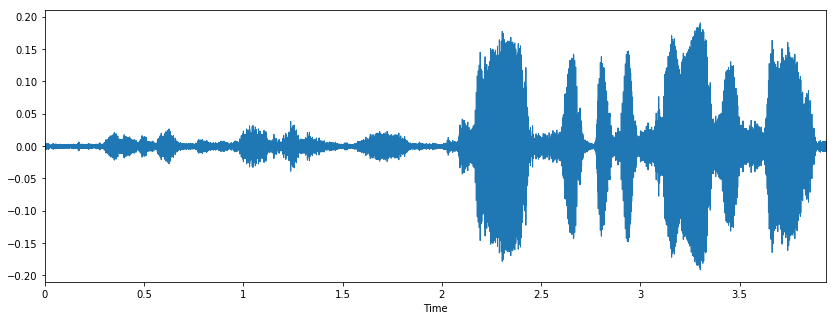

In [116]:
audio_inv = librosa.griffinlim(magnitude)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_inv, sr=sr)
ipd.Audio(audio_inv, rate=sr) # load a NumPy array

# <font color='blue'>From Spectrogram to Mel-spectrogram and back</font>

In [118]:
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=sr/2)
mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)

### Mel Spectrogram

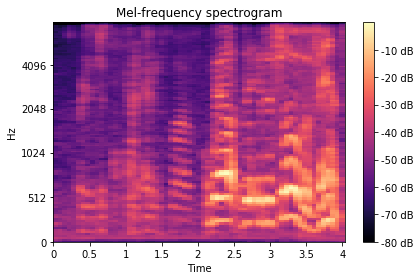

In [120]:
librosa.display.specshow(mel_spec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

### Spectrogram from Mel Spectrogram

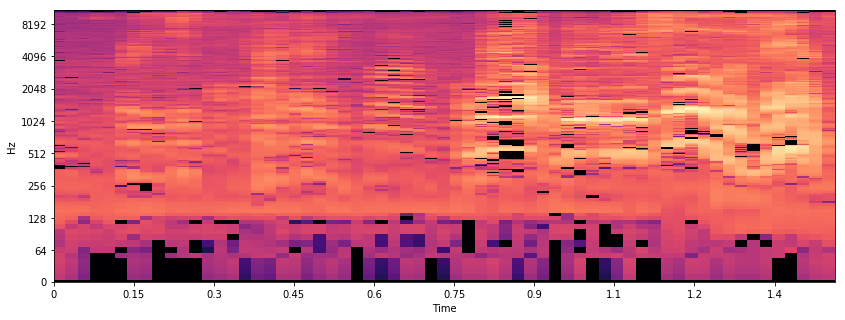

In [110]:
S_inv = librosa.feature.inverse.mel_to_stft(mel_spec, sr=sr)
Xdb = librosa.amplitude_to_db(abs(S_inv))
plt.figure(figsize=(14, 5))
librosa.display.specshow(librosa.amplitude_to_db(S_inv, ref=np.max, top_db=None),
                          y_axis='log', x_axis='time')

### Audio from Spectrogram obtained with inverse of Mel Spectrogram

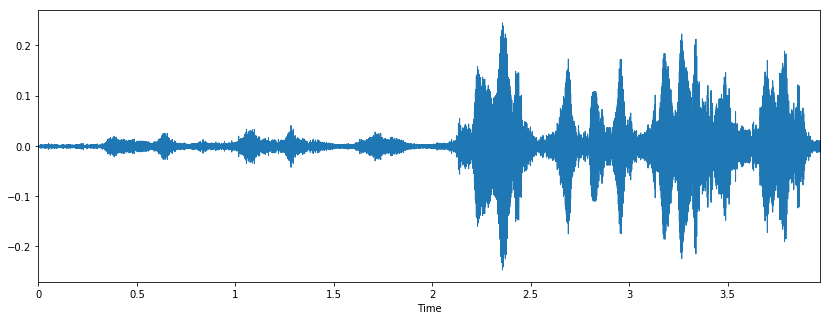

In [117]:
audio_inv = librosa.griffinlim(np.abs(S_inv))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_inv, sr=sr)
ipd.Audio(audio_inv, rate=sr) # load a NumPy array